# **Binary Classification of Movie Reviews**

This is a binary classifier of movie reviews into positive and negative reviews.
We will be working with a dataset from IMDB. This is a set of 50,000 highly polarized reviews from the Database. They are equally split into 25,000 reviews from the training phase and 25,000 for the testing phase. Each one of this two groups is split into 50% of positive reviews and 50% of negative reviews.

## **Loading the dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # considering only the top 10,000 words in the reviews

17464789/17464789 [==============================] - 0s 0us/step


## **Data Exploration**

Each review is a list of word indices which encode sequences of words. The train and test datasets include 25,000 of such lists of word indices. On the other hand, the train and test labels are arrays of 1s and 0s based on wether the review is respectively positive or negative.

In [2]:
train_data.shape

(25000,)

In [3]:
test_data.shape

(25000,)

In [ ]:
train_data[0]

In [5]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [6]:
train_labels.dtype

dtype('int64')

Recall that we have restriceted our attention to the top 10,000 most common words used in the reviews. Therefore the word indices are capped and will not exceed 10,000.

In [7]:
max([max(sequence) for sequence in train_data])

9999

## **Preparing the Data**

We must turn our lists into tensors. We can do this in two ways:


1.   Padding the lists in order to have a common length. We thus turn them into an integer tensor of shape (samples, max_length). An Embedding layer is capable of handling such tensors.
2.   We could use Multi-hot encoding. Here each list of indices is vectorized into a vector of 10,000 entries, mostly 0s except for the word indices which are assigned a value of 1. We could start the model with a Dense layer.

We use the second method.



In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

We vectorize the test labels.

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [10]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## **Building the Model**

Give vector inputs and scalar outputs, the model to be applied will remain quiet simple. In particular, we apply a stack of densely connected layers with rectified linear activation functions. In particular the model will be formed by two intermediate layers with 16 units each and a final third layer with one unit, which outputs the scalar prediction regarding the sentment of the current review.

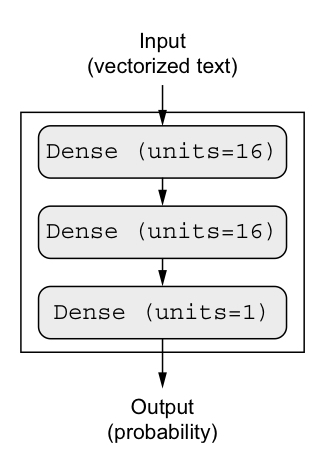

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

We compile the model by choosing binary crossentropy as our loss function and an rmsprop optimizer for our gradient descent phase.

In [13]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

## **Validation**

We set up a validation set from the training set by taking 10,000 samples from the original training data.

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 85ms/step - loss: 0.5615 - accuracy: 0.7522 - val_loss: 0.4380 - val_accuracy: 0.8578
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3648 - accuracy: 0.8869 - val_loss: 0.3411 - val_accuracy: 0.8832
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2647 - accuracy: 0.9233 - val_loss: 0.2984 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2097 - accuracy: 0.9332 - val_loss: 0.2894 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1758 - accuracy: 0.9463 - val_loss: 0.2807 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1478 - accuracy: 0.9553 - val_loss: 0.2865 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1247 - accuracy: 0.9633 - val_loss: 0.2978 - val_accuracy: 0.8811
Epoch 8/20
30

## **Plotting Losses and Accuracy**

In [ ]:
history_dict = history.history

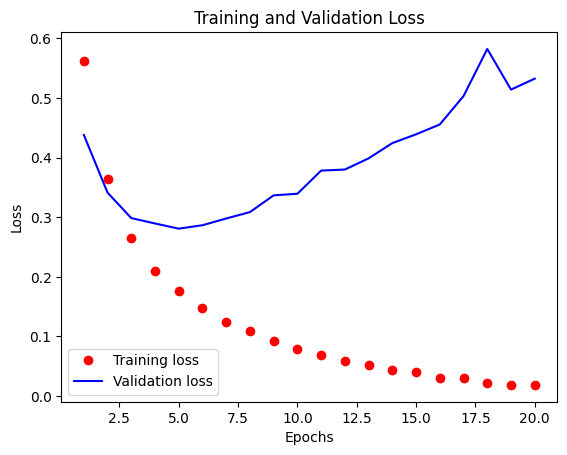

In [18]:
import matplotlib.pyplot as plt
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

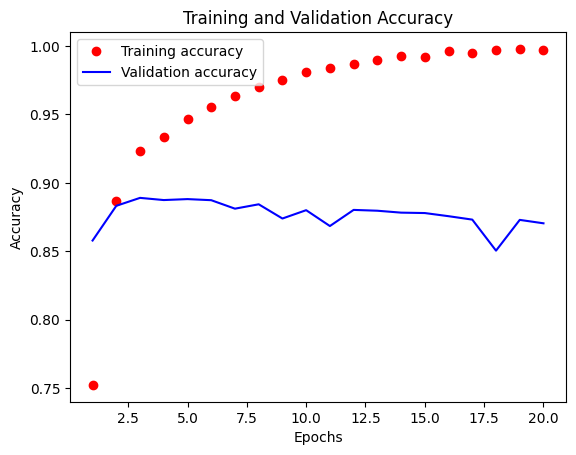

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.5735 - accuracy: 0.8582


[0.5734979510307312, 0.858240008354187]

We can see that the model is overfitting after 20 epochs as the validation loss increases instead of decreasing and the validation accuracy records a downward trend. We can see how 4 epochs would have been enough in order to mitigate overfitting.

In [21]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 3s 68ms/step - loss: 0.5590 - accuracy: 0.7675 - val_loss: 0.4495 - val_accuracy: 0.8478
Epoch 2/4
30/30 [==============================] - 1s 22ms/step - loss: 0.3696 - accuracy: 0.8863 - val_loss: 0.3417 - val_accuracy: 0.8815
Epoch 3/4
30/30 [==============================] - 1s 26ms/step - loss: 0.2728 - accuracy: 0.9136 - val_loss: 0.3044 - val_accuracy: 0.8807
Epoch 4/4
30/30 [==============================] - 1s 30ms/step - loss: 0.2211 - accuracy: 0.9270 - val_loss: 0.2894 - val_accuracy: 0.8856


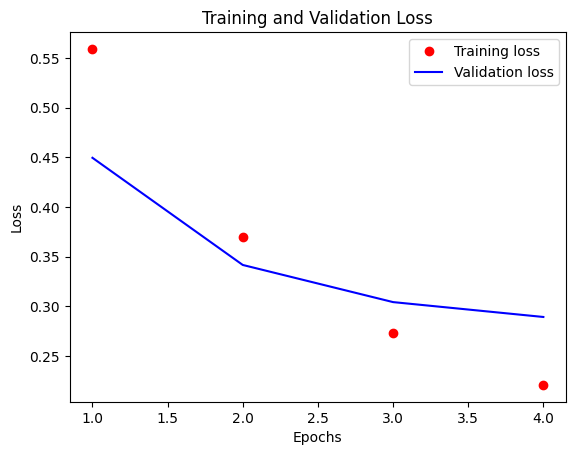

In [23]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

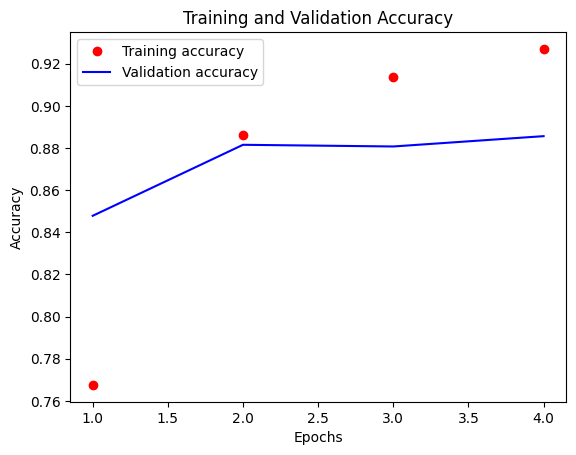

In [24]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3046 - accuracy: 0.8765


[0.3045869767665863, 0.8765199780464172]

With just 4 epochs, the overall test loss has decreased to 0.30 and the accuracy has increased to 0.87.